In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
rock_data = pd.read_excel("aggregateRockData-1.xlsx", usecols=[1], nrows=480, names=["rock category"])
attribute_data = pd.read_csv("norm540.txt", sep='\t', usecols=list(range(3, 22)), nrows=480)
token_data=pd.read_csv("norm540.txt", sep='\t', usecols=[2], nrows=480, names=["Token Number"])


**Displaying the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute.**

In [5]:
# Assign meaningful column names
attribute_names = [
    "Porphyritic texture",
    "Presence of holes",
    "Salient green hue",
    "Pegmatitic texture",
    "Conchoidal fracture",
    "Angular fragments",
    "Rounded fragments",
    "Straight stripes",
    "Curved stripes",
    "Physical layers",
    "Veins",
    "Oily/shimmery texture",
    "Splotchy texture",
    "Single translucent crystal",
    "Multiple cubic crystals",
    "Sandy texture",
    "Fragments (disjunctive)",
    "Stripes (disjunctive)",
    "Crystals (disjunctive)"
]

attribute_data.columns = attribute_names

**Statistical descriptions**

In [6]:
# Display summary statistics
statistics = attribute_data.describe()
print(statistics)

       Porphyritic texture  Presence of holes  Salient green hue  \
count           480.000000         480.000000         480.000000   
mean              0.000452          -0.019915          -0.002570   
std               1.001392           0.990022           0.993719   
min              -1.321491          -0.407623          -1.187950   
25%              -0.823647          -0.407623          -0.761505   
50%              -0.300910          -0.407623          -0.375197   
75%               0.766966          -0.159688           0.517828   
max               2.422299           4.551072           2.750390   

       Pegmatitic texture  Conchoidal fracture  Angular fragments  \
count          480.000000           480.000000         480.000000   
mean            -0.000836            -0.012302          -0.006879   
std              0.979725             0.997488           0.985432   
min             -1.322715            -1.248012          -0.436004   
25%             -0.804631            -0.69

**Visualizations**

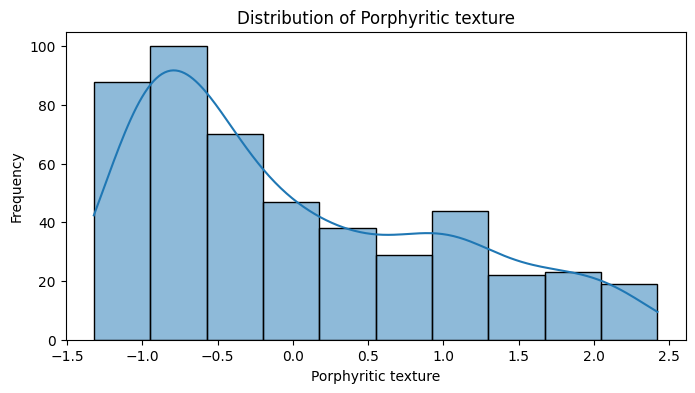

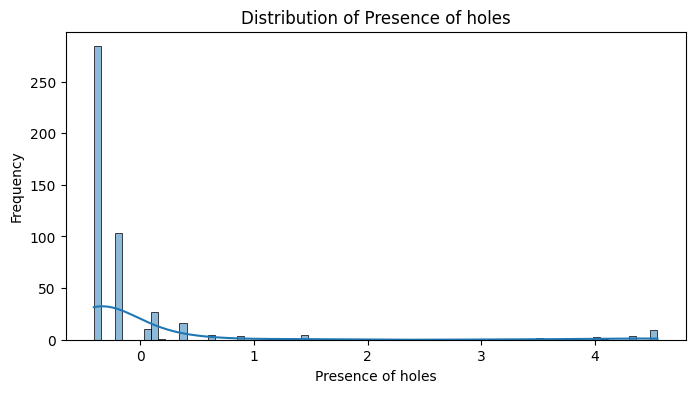

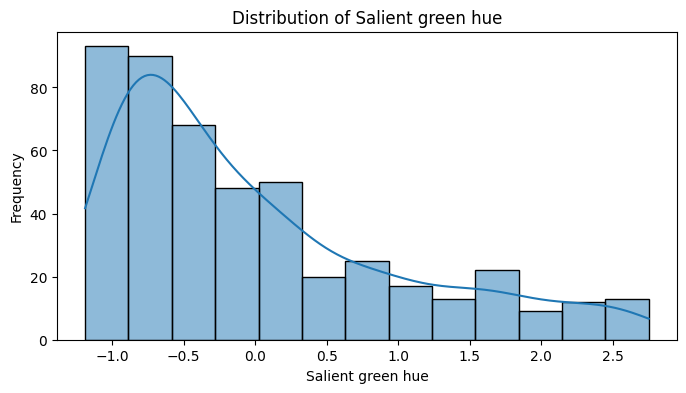

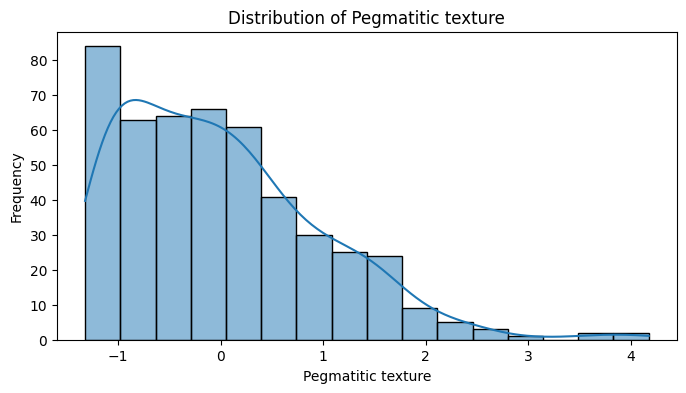

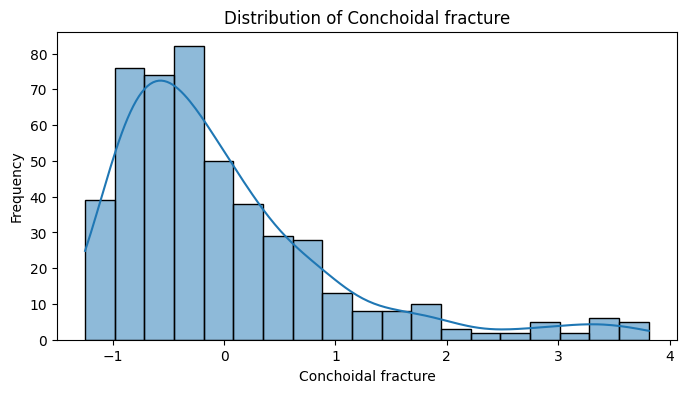

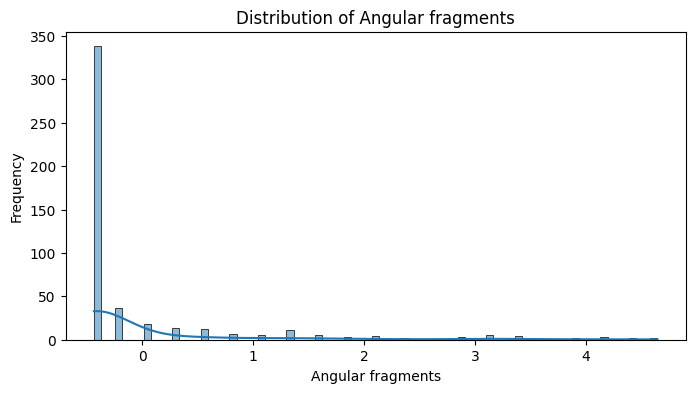

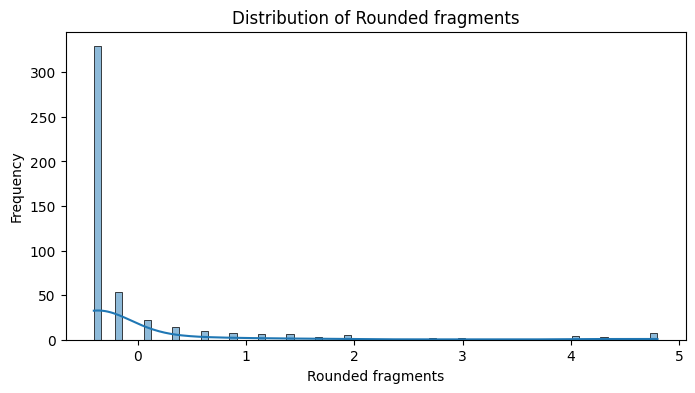

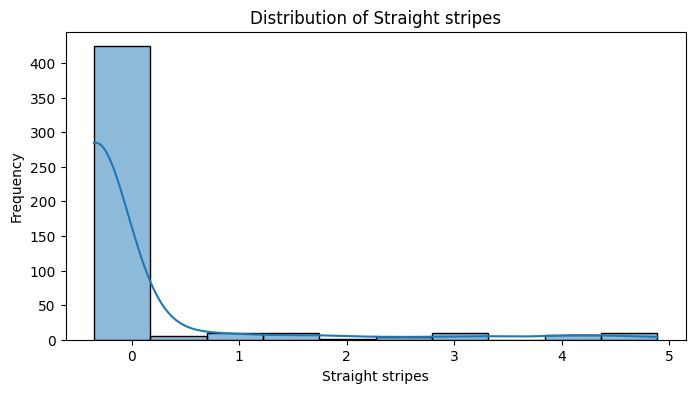

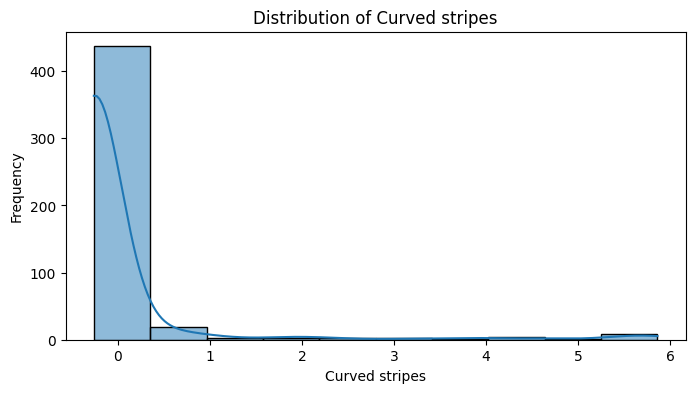

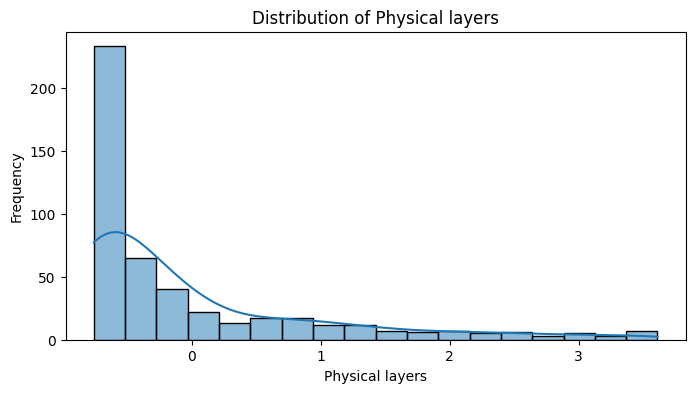

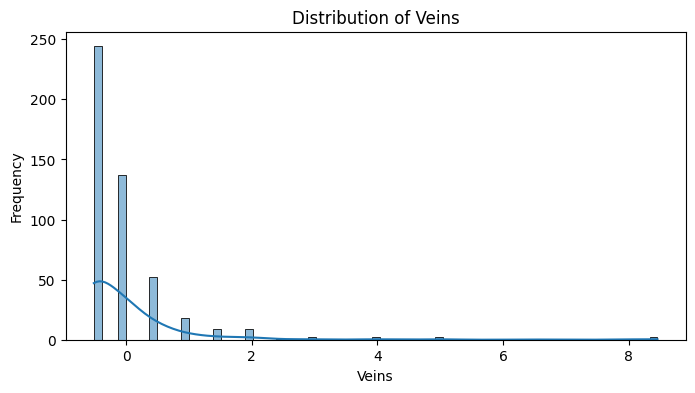

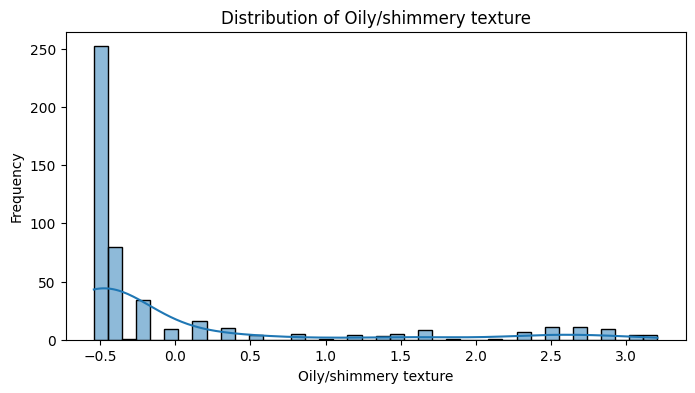

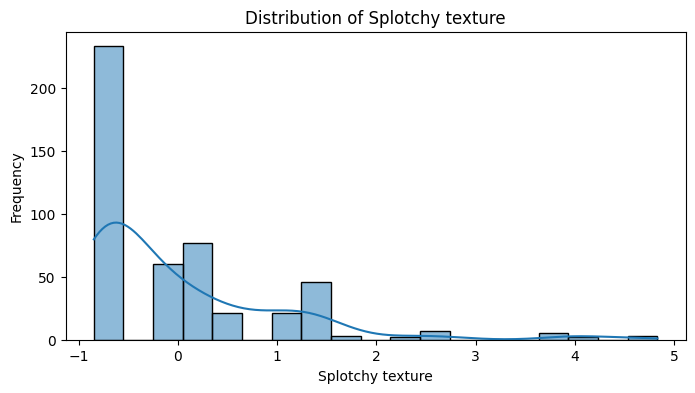

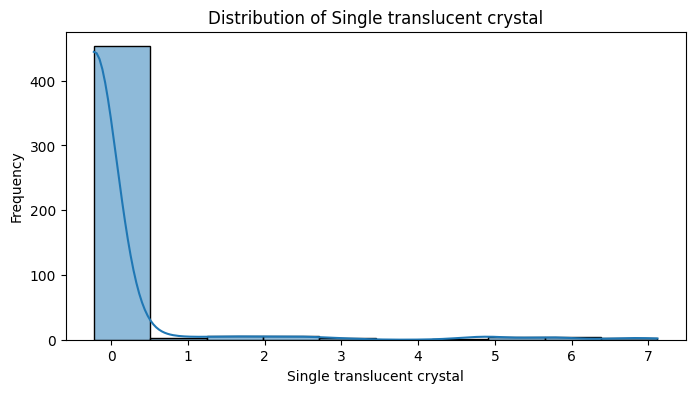

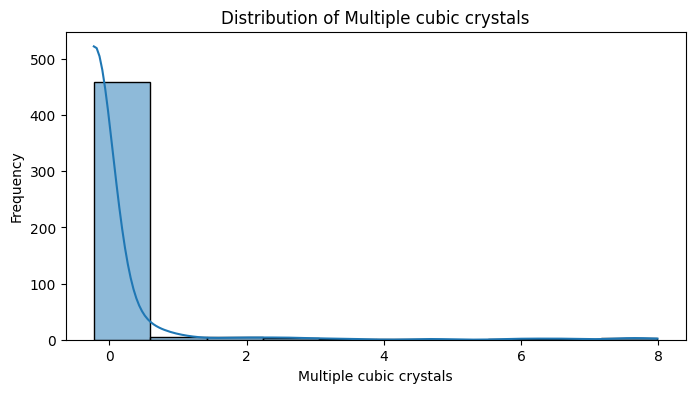

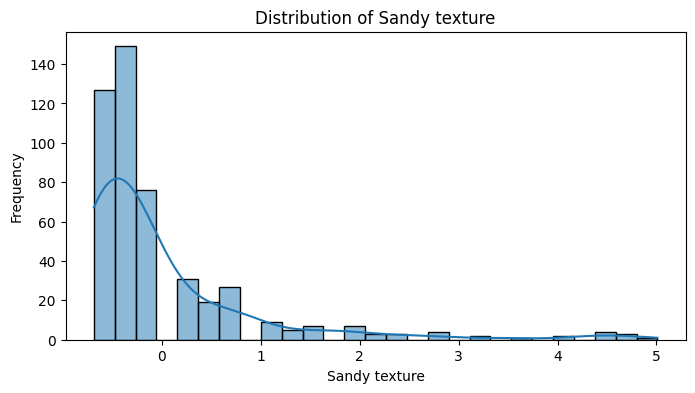

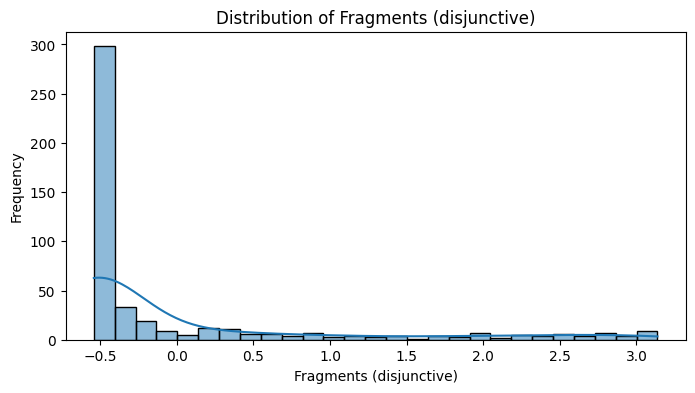

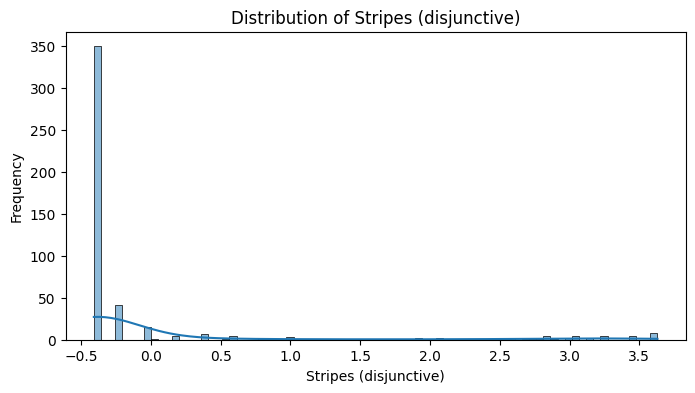

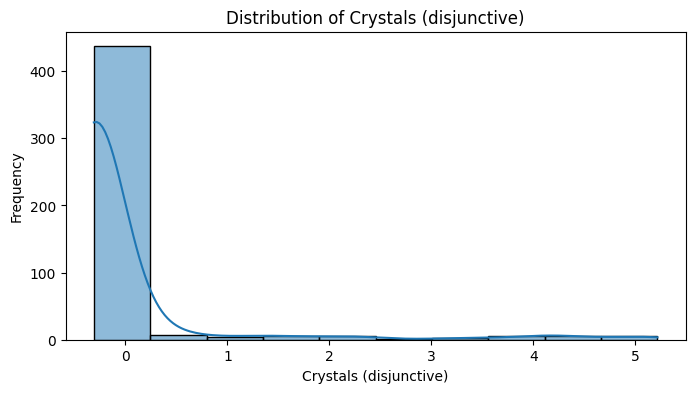

In [7]:
# Plot histograms for each attribute
for column in attribute_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(attribute_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

From looking at the histograms, we can see that all the attributes are mostly stretching to the right, which means they are right-skewed. Some attributes, like the angular and rounded fragments, as well as the veins, show similar kinds of patterns in how they spread out. On the other hand, attributes like crystals and stripes, along with multiple cubic and single translucent crystals, have a lot of small values but hardly any large ones when you look at how often they come up.

Tried to fix this skewness by using a square root change on the attributes. We chose this method because we wanted to make the spread of the attributes more even, especially since they were so heavily right-skewed.








In [8]:
import numpy as np

# Create a list of column names (attributes) in your dataset
attribute_data_columns = attribute_data.columns

# Apply a square root transformation to each attribute
for attr in attribute_data_columns:
    # Check if the attribute is numeric (e.g., not a label)
    if np.issubdtype(attribute_data[attr].dtype, np.number):
        attribute_data[attr] = np.sqrt(attribute_data[attr])

C:\Users\WELCOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


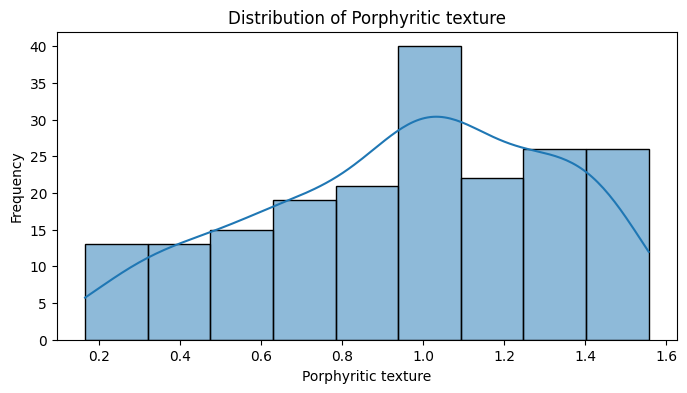

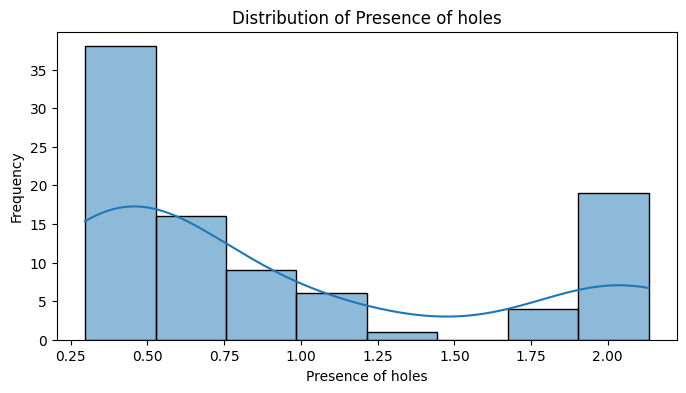

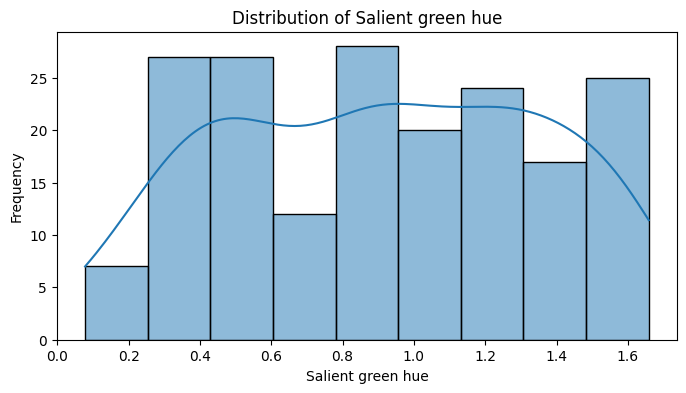

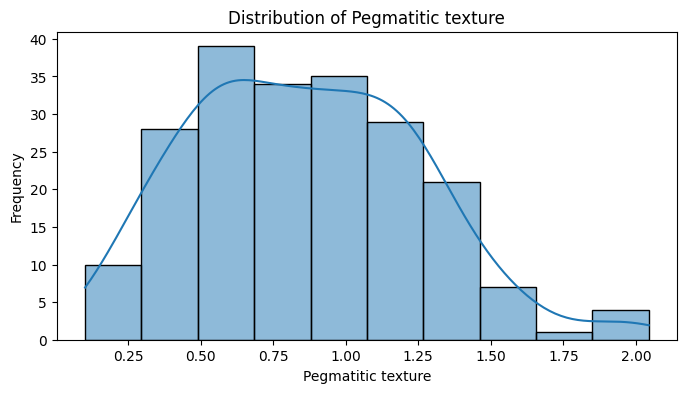

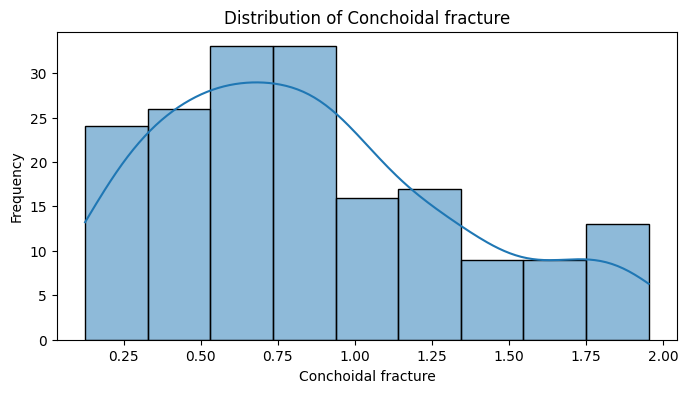

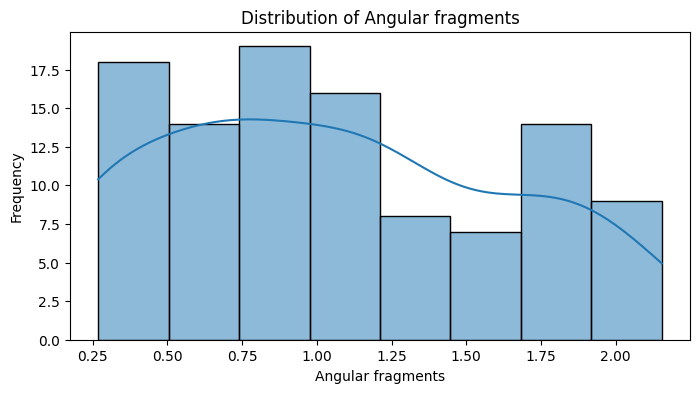

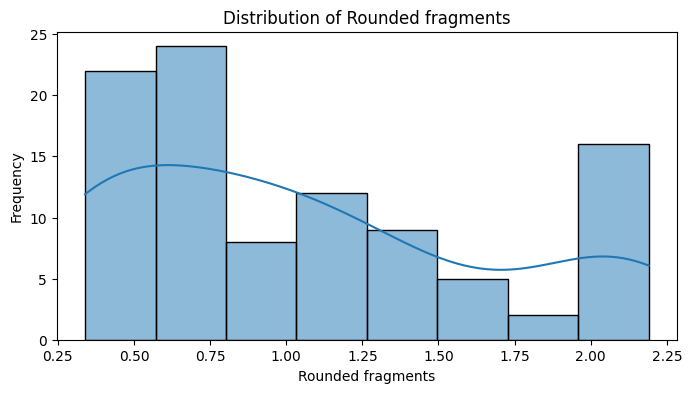

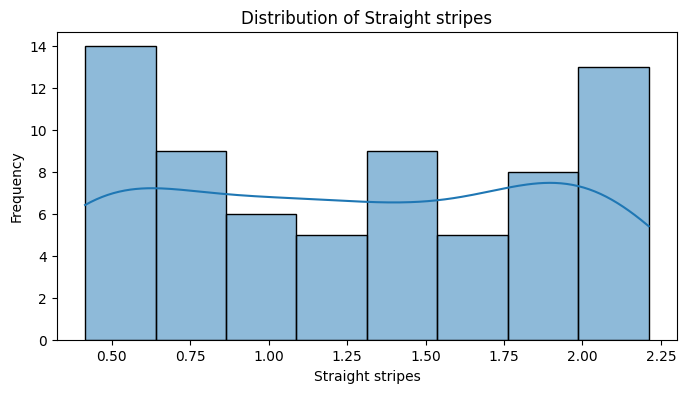

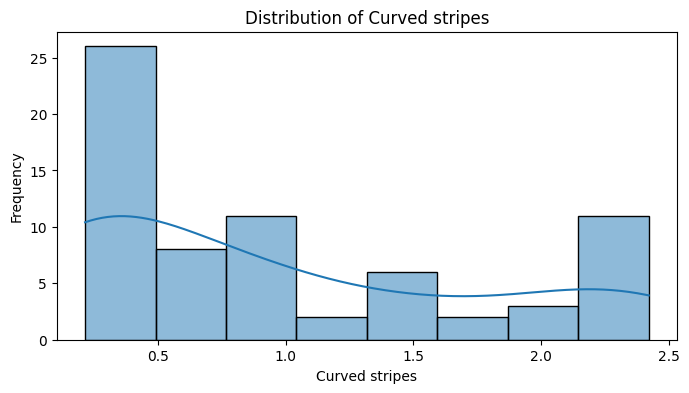

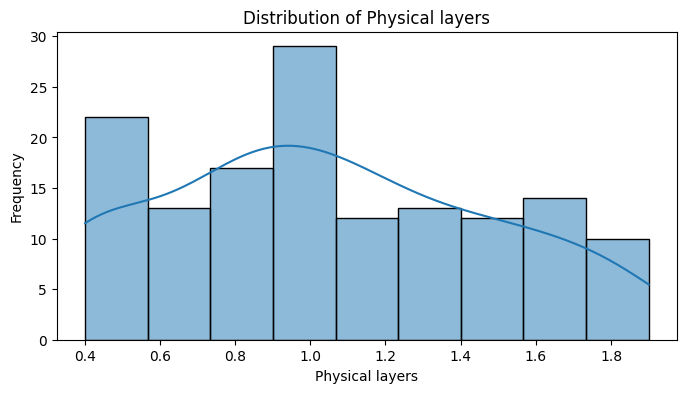

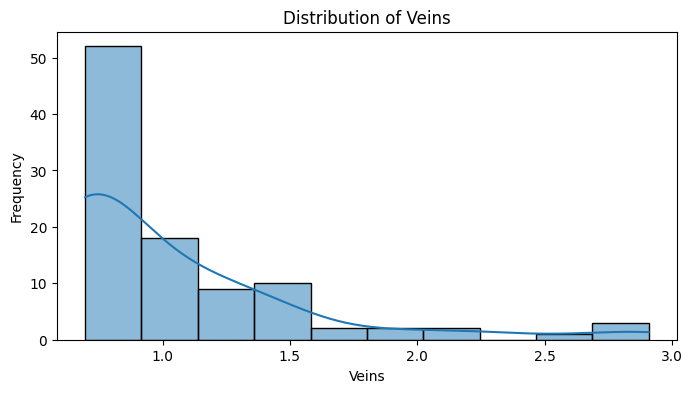

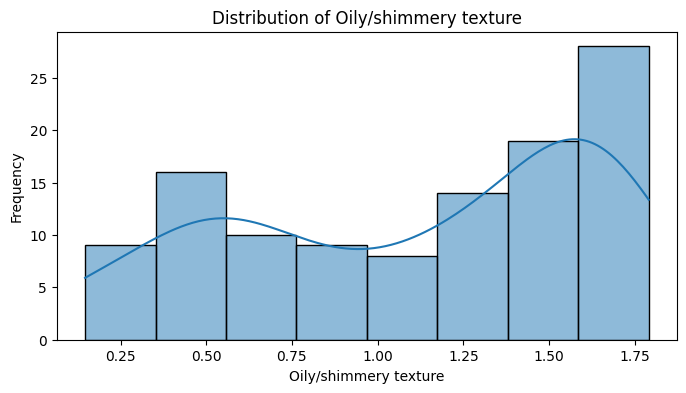

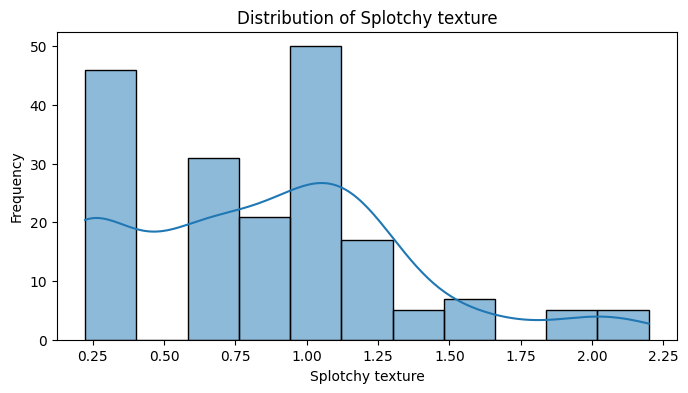

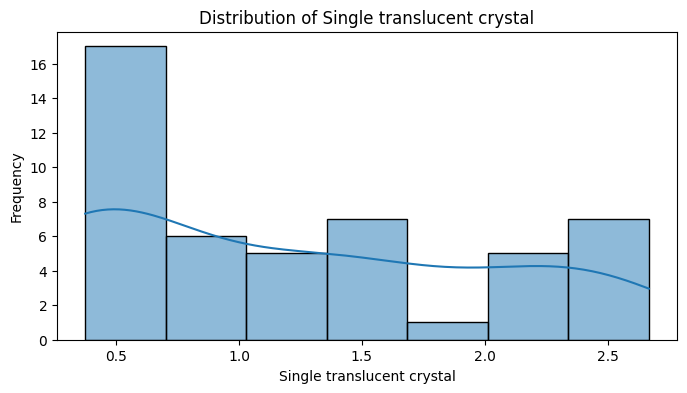

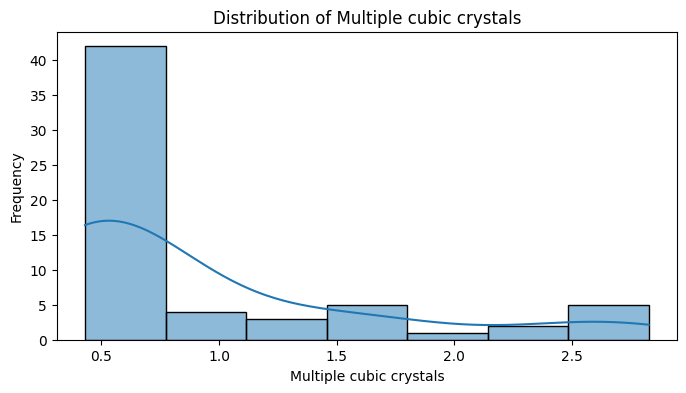

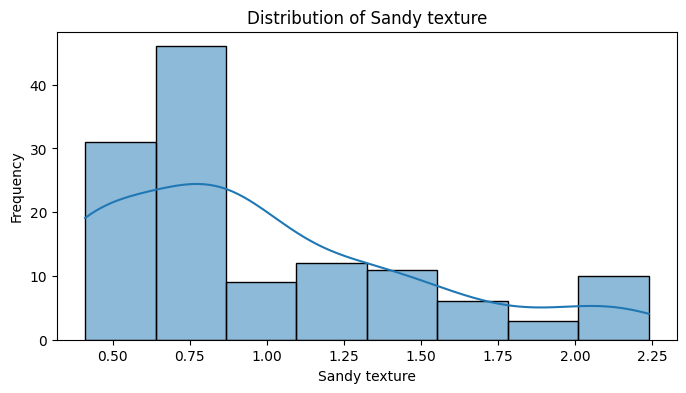

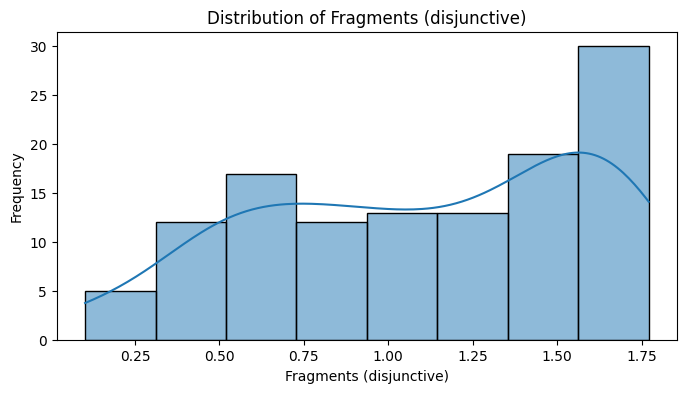

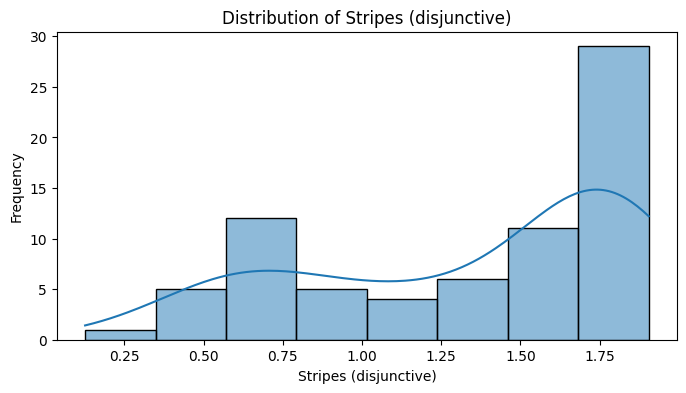

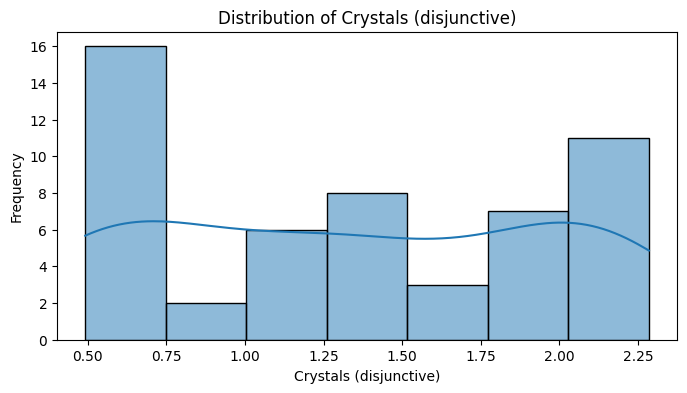

In [9]:
# Plot histograms for each attribute
for column in attribute_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(attribute_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

The skewness is removed by applying Square root transform

In [10]:
attribute_data.isnull().sum()

Porphyritic texture           285
Presence of holes             387
Salient green hue             293
Pegmatitic texture            272
Conchoidal fracture           300
Angular fragments             375
Rounded fragments             382
Straight stripes              411
Curved stripes                411
Physical layers               338
Veins                         381
Oily/shimmery texture         367
Splotchy texture              293
Single translucent crystal    432
Multiple cubic crystals       418
Sandy texture                 352
Fragments (disjunctive)       359
Stripes (disjunctive)         407
Crystals (disjunctive)        427
dtype: int64

**Analysing and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots**

                            Porphyritic texture  Presence of holes  \
Porphyritic texture                    1.000000          -0.181601   
Presence of holes                     -0.181601           1.000000   
Salient green hue                      0.205400          -0.008385   
Pegmatitic texture                     0.146925          -0.047175   
Conchoidal fracture                    0.062225          -0.291075   
Angular fragments                      0.464689          -0.122688   
Rounded fragments                      0.544725          -0.298588   
Straight stripes                      -0.090426           0.713204   
Curved stripes                        -0.390138          -0.882783   
Physical layers                       -0.854029          -0.364786   
Veins                                 -0.091997                NaN   
Oily/shimmery texture                  0.013736          -0.440973   
Splotchy texture                      -0.210356          -0.223379   
Single translucent c

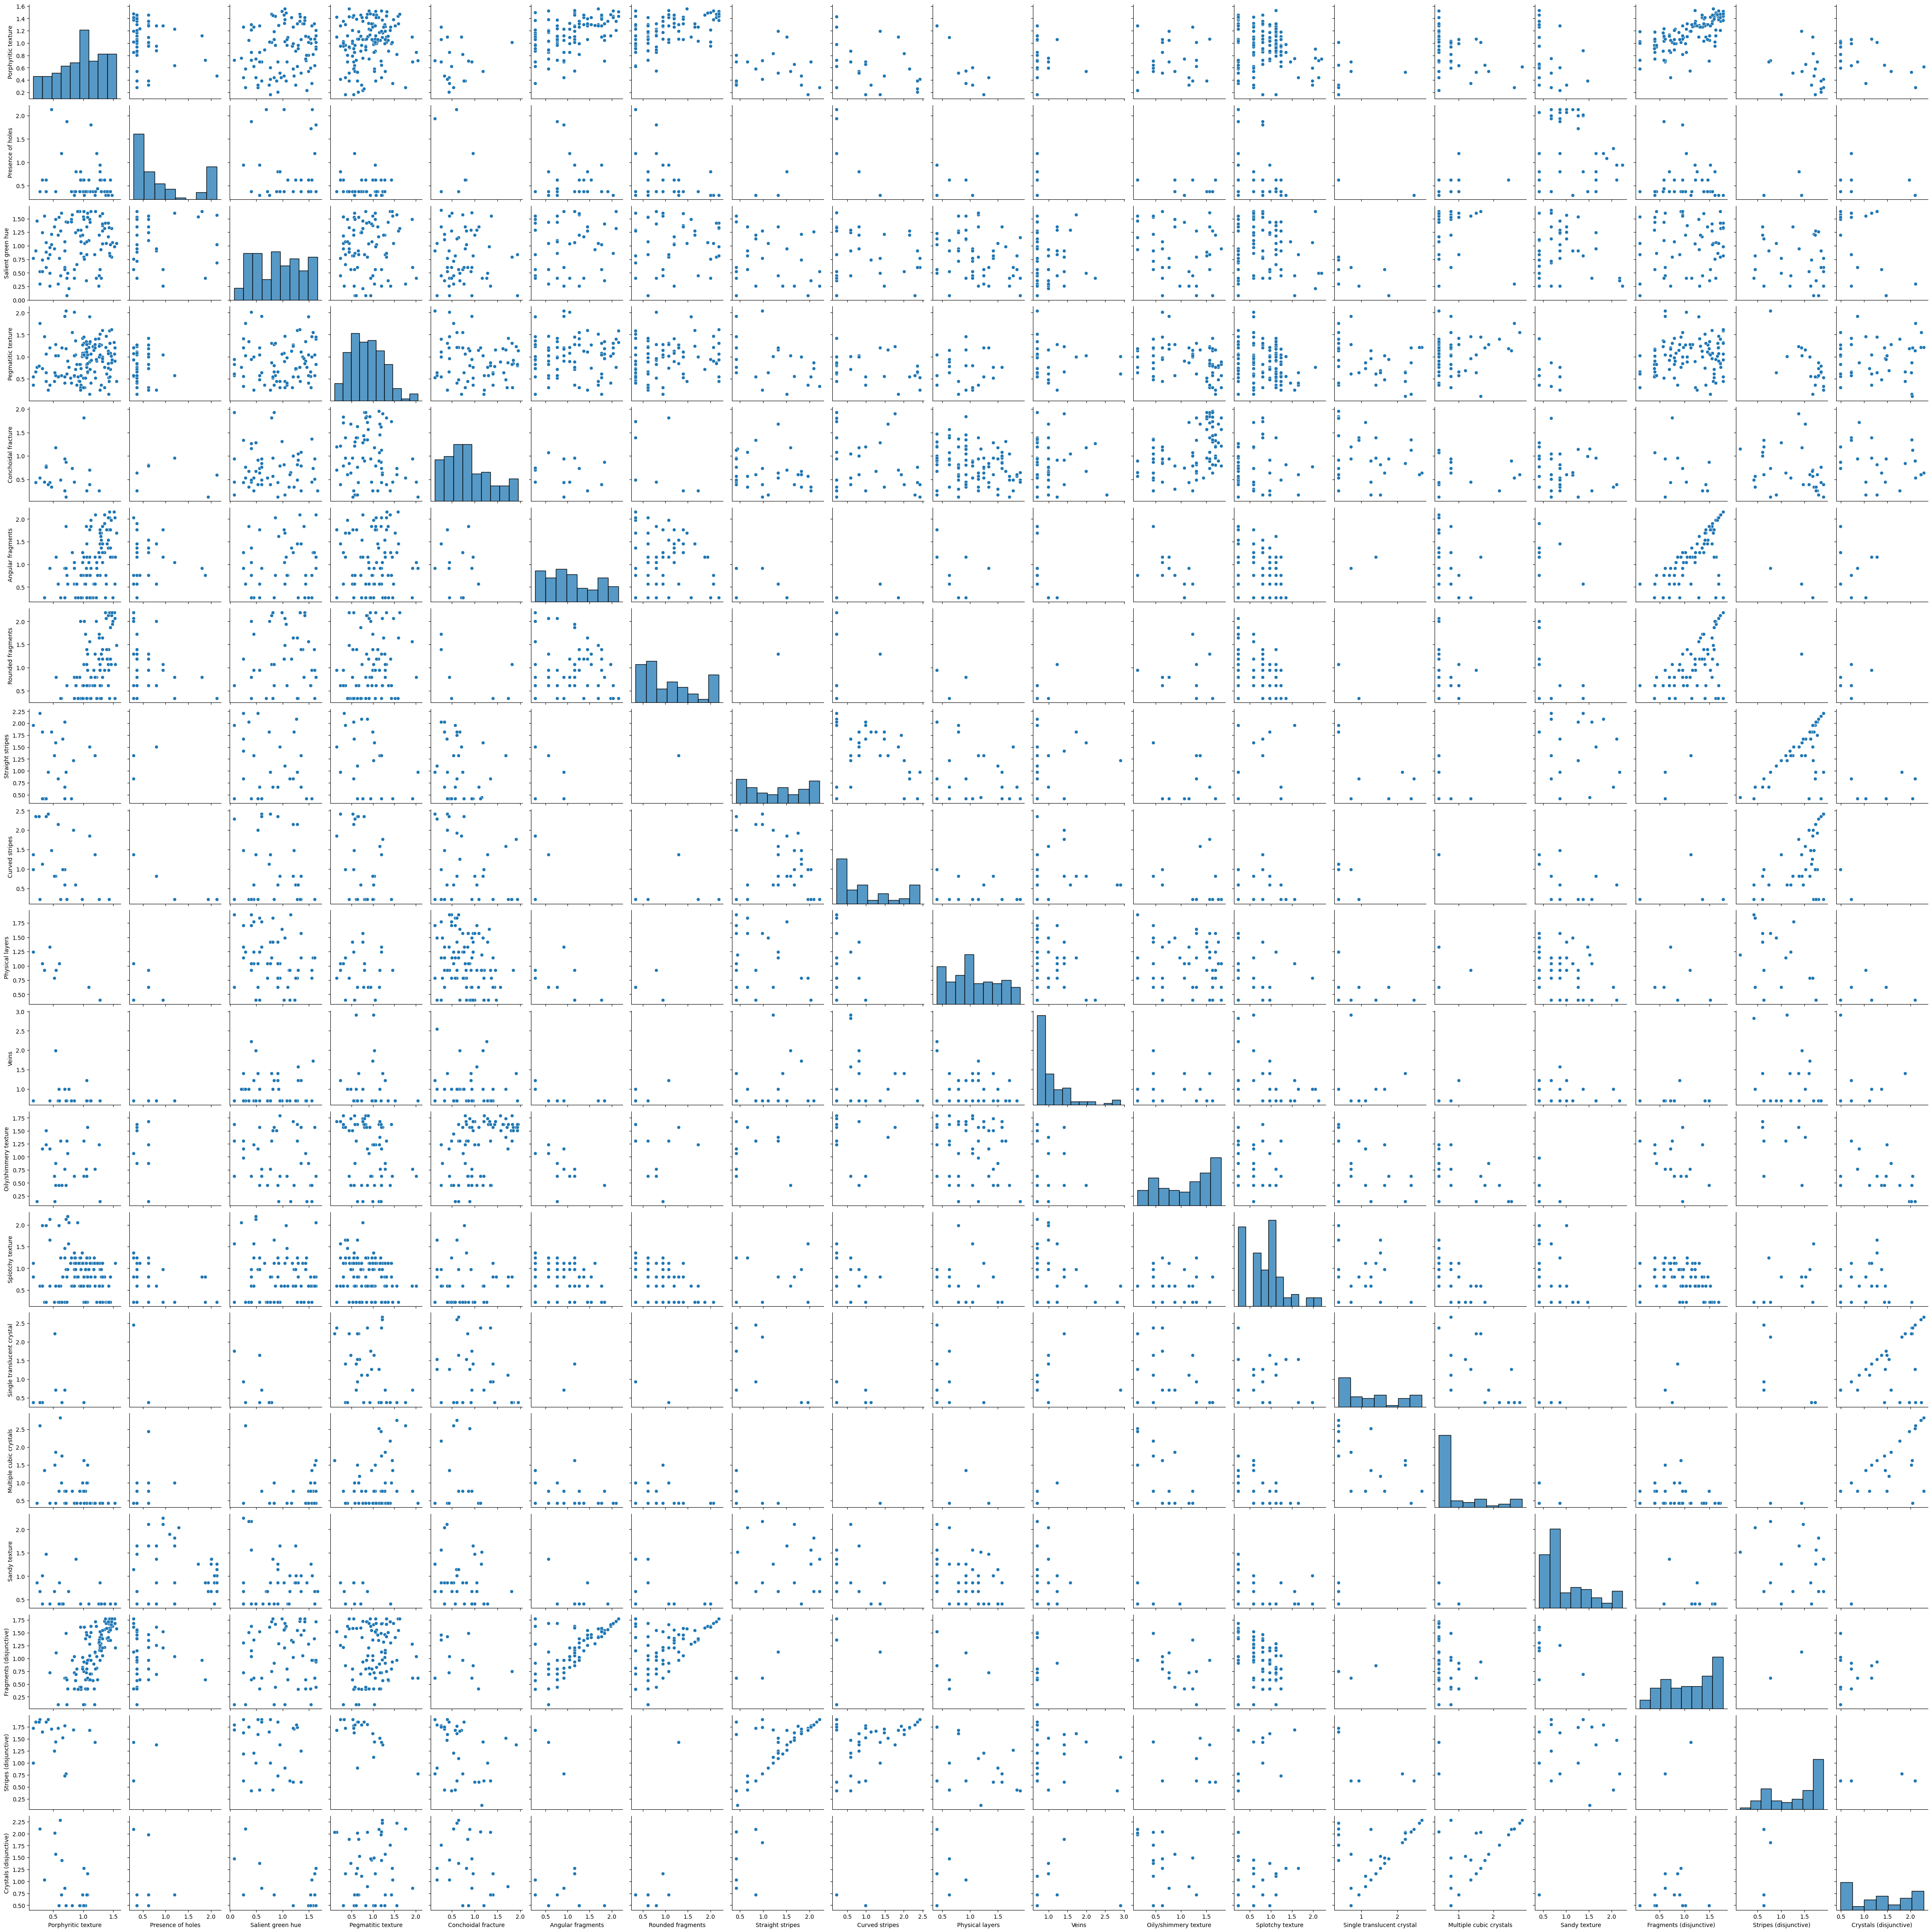

In [11]:
correlation_matrix = attribute_data.corr()
print(correlation_matrix)
# Generate scatter plots for key attribute pairs
sns.pairplot(attribute_data)
plt.show()

**PCC between label (rock category) and attributes**

In [12]:
correlation_matrix = pd.concat([rock_data, attribute_data], axis=1).corr()
correlation_with_label = correlation_matrix.iloc[0, 1:]

# Display PCC values for each attribute
print("Pearson Correlation Coefficients with Label:")
print(correlation_with_label)

Pearson Correlation Coefficients with Label:
Porphyritic texture          -0.017944
Presence of holes            -0.272771
Salient green hue            -0.155960
Pegmatitic texture            0.024465
Conchoidal fracture          -0.146585
Angular fragments             0.262784
Rounded fragments             0.422041
Straight stripes              0.035009
Curved stripes               -0.142699
Physical layers              -0.039881
Veins                         0.065365
Oily/shimmery texture        -0.202985
Splotchy texture             -0.123487
Single translucent crystal    0.467668
Multiple cubic crystals       0.552165
Sandy texture                 0.301058
Fragments (disjunctive)       0.481428
Stripes (disjunctive)        -0.224850
Crystals (disjunctive)        0.658528
Name: rock category, dtype: float64


**For training data, used token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers).**

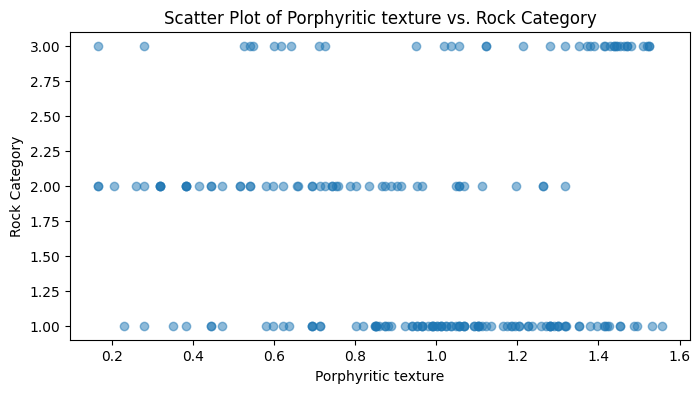

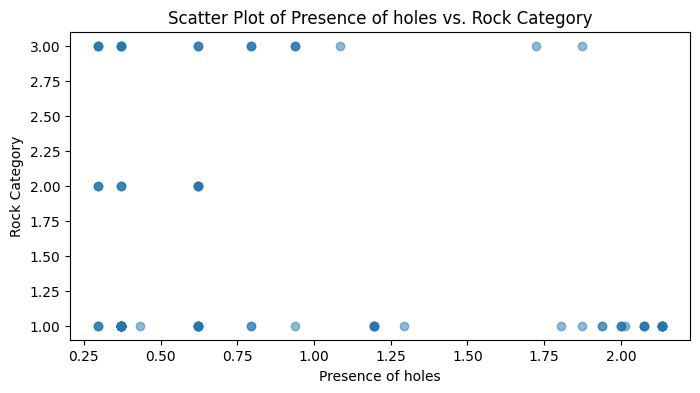

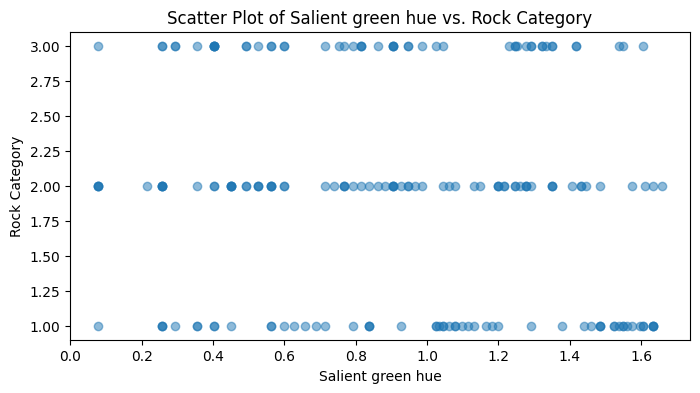

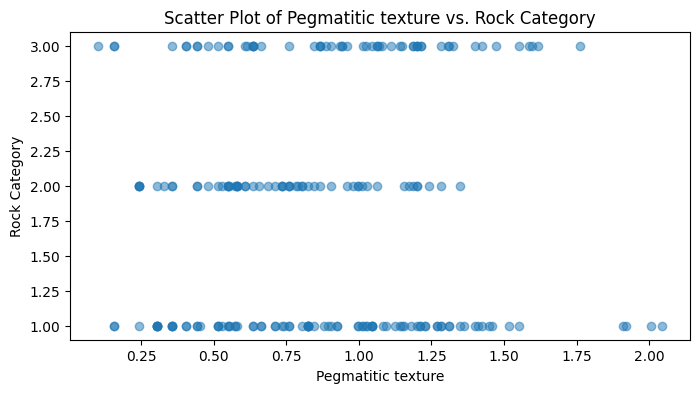

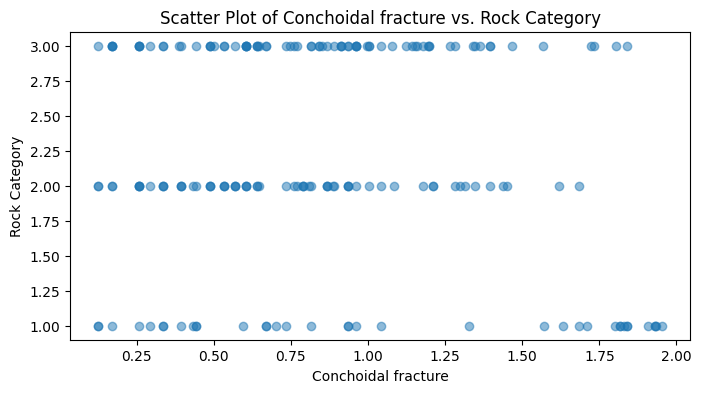

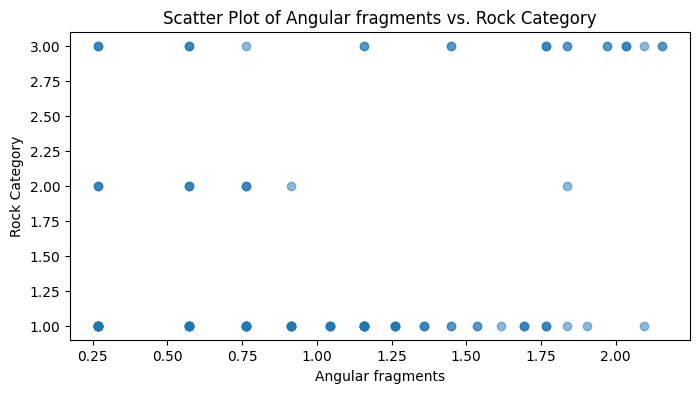

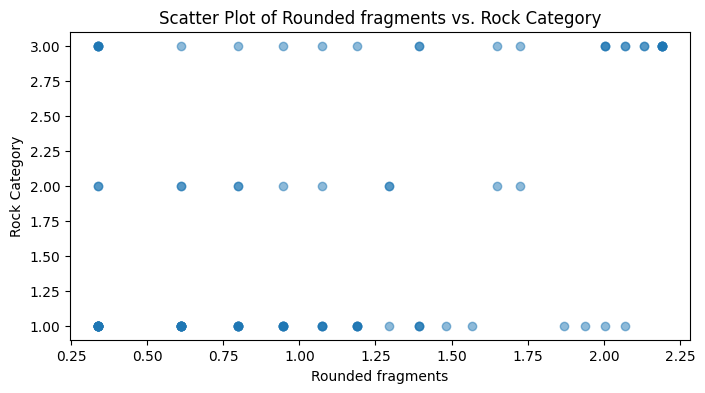

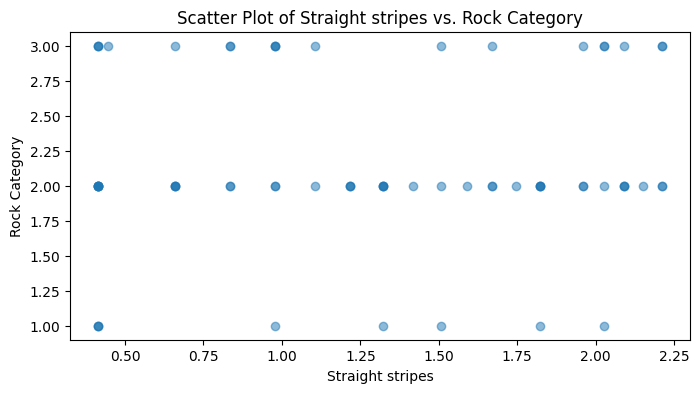

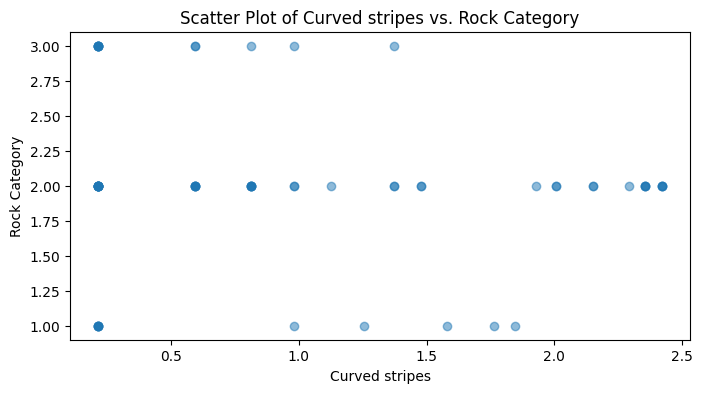

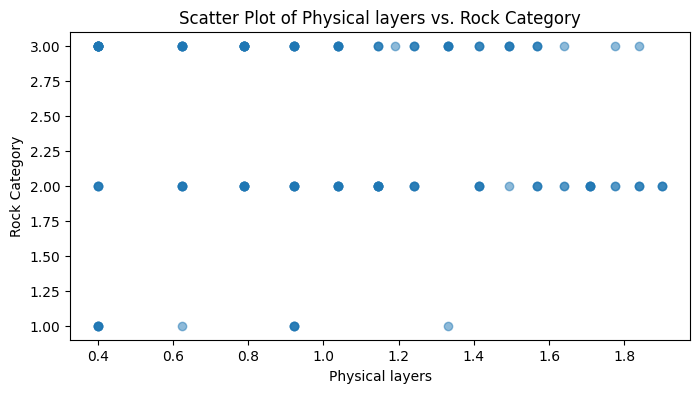

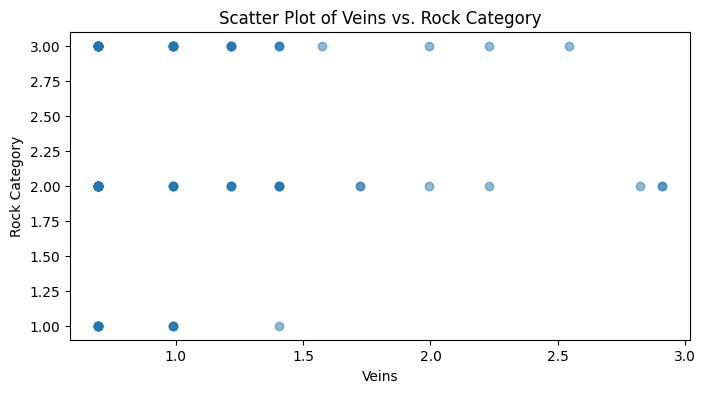

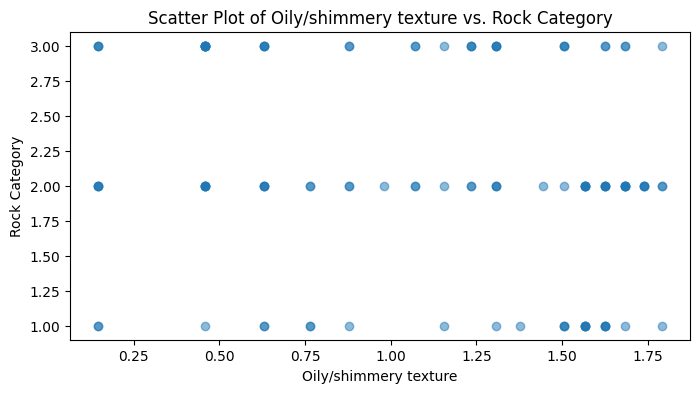

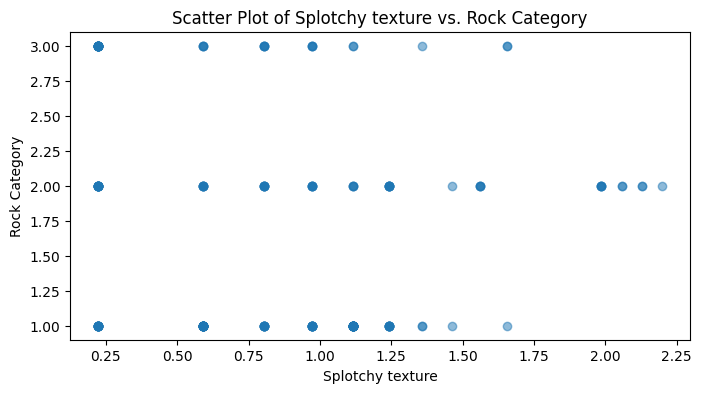

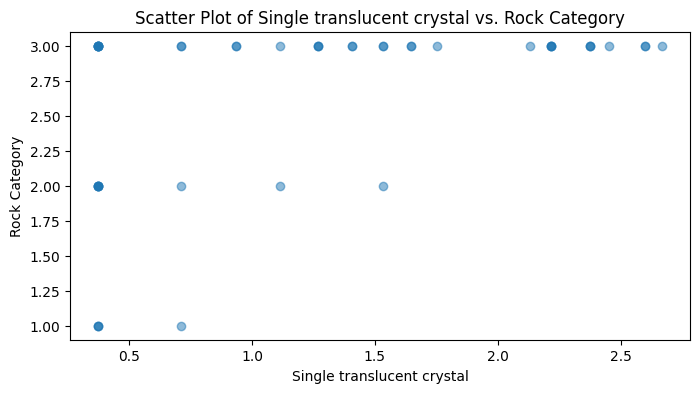

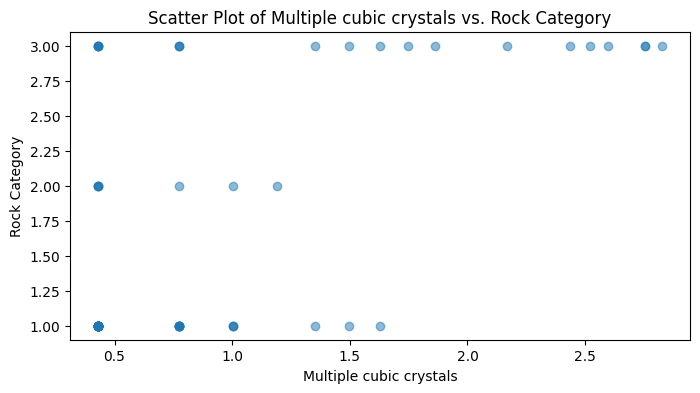

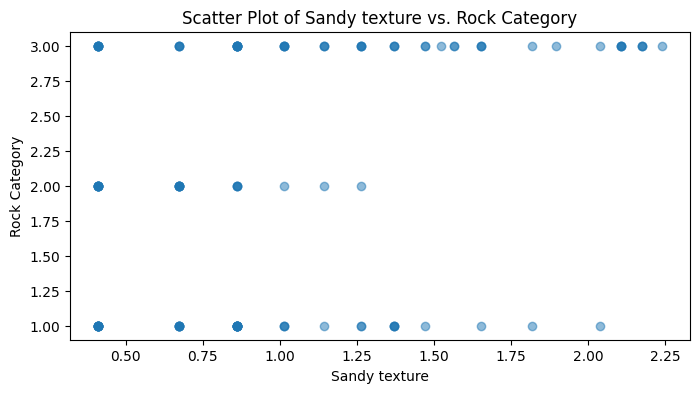

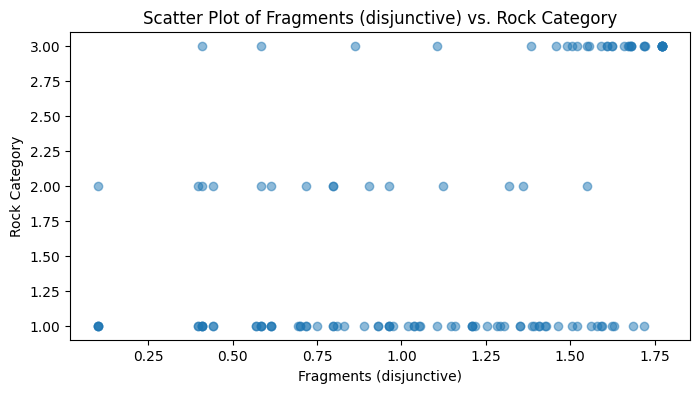

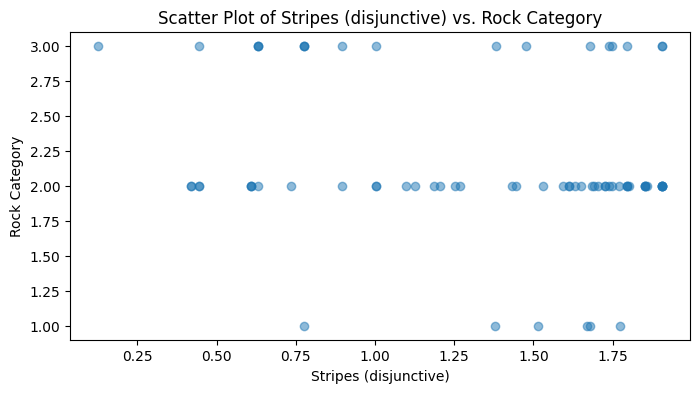

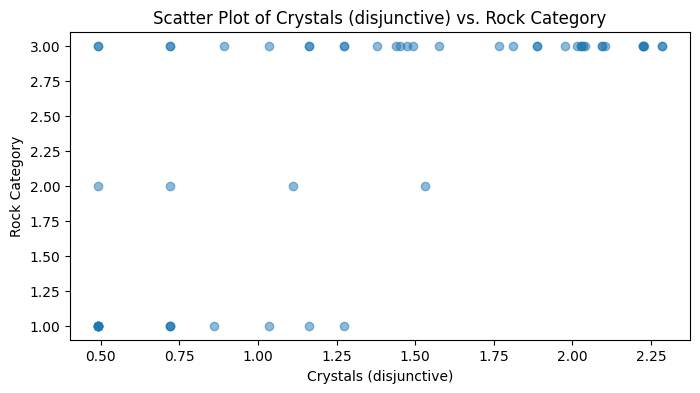

In [13]:
# Concatenate the two dataframes
full_data = pd.concat([rock_data, attribute_data,token_data], axis=1)
for column in attribute_data.columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(full_data[column], full_data["rock category"], alpha=0.5)
    plt.title(f'Scatter Plot of {column} vs. Rock Category')
    plt.xlabel(column)
    plt.ylabel("Rock Category")
    plt.show()


Looking at how the attributes and the label relate to each other:

- Attributes like "Crystals (disjunctive)," "Multiple cubic crystals," and "Single translucent crystal" seem to go up as the label goes up too. This shows they've got a strong connection where if one is big, the other one is likely to be big too.

- For attributes such as "Presence of holes," "Sandy texture," and "Fragments (disjunctive)," they kind of have a good connection with the label as well, but it's not as strong.

- Then there are attributes like "Rounded fragments" and "Angular fragments" that also go up with the label, but the connection is not that big.

- On the flip side, attributes that have a negative link, like "Veins," go in the opposite direction of the label. So if the value for "Veins" is high, the label value tends to be lower.

- There are some attributes, "Porphyritic texture" and "Pegmatitic texture," that don't really move much in line with the label. They don't show much of a link.

Knowing these connections is super helpful because it tells us which attributes can really help us guess the label's values better.

In [14]:
full_data.describe()
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rock category               480 non-null    int64  
 1   Porphyritic texture         195 non-null    float64
 2   Presence of holes           93 non-null     float64
 3   Salient green hue           187 non-null    float64
 4   Pegmatitic texture          208 non-null    float64
 5   Conchoidal fracture         180 non-null    float64
 6   Angular fragments           105 non-null    float64
 7   Rounded fragments           98 non-null     float64
 8   Straight stripes            69 non-null     float64
 9   Curved stripes              69 non-null     float64
 10  Physical layers             142 non-null    float64
 11  Veins                       99 non-null     float64
 12  Oily/shimmery texture       113 non-null    float64
 13  Splotchy texture            187 non

In [15]:
# Drop the specified columns from the DataFrame
features_updated=full_data.copy()
features_updated.drop(columns=[features_updated.columns[0], features_updated.columns[3], features_updated.columns[7], features_updated.columns[9], features_updated.columns[10]],axis=1)

,Porphyritic texture,Presence of holes,Pegmatitic texture,Conchoidal fracture,Angular fragments,Straight stripes,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive),Token Number
0,1.300180,NaN,0.357662,NaN,1.692859,NaN,NaN,NaN,NaN,NaN,0.430709,NaN,1.429314,NaN,NaN,1
1,1.290572,NaN,NaN,NaN,1.616103,NaN,NaN,NaN,1.115985,NaN,NaN,NaN,1.290684,NaN,NaN,2
2,1.494362,NaN,NaN,NaN,0.268257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.625034,NaN,NaN,3
3,1.487684,NaN,NaN,NaN,1.158394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.630684,NaN,NaN,4
4,1.352725,0.621102,0.305586,NaN,1.263273,NaN,NaN,NaN,0.804748,NaN,NaN,NaN,1.217344,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.143569,NaN,NaN,NaN,12
476,NaN,NaN,NaN,0.501798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.673284,NaN,NaN,NaN,13
477,NaN,NaN,NaN,NaN,NaN,NaN,0.696042,NaN,NaN,NaN,NaN,0.673284,NaN,NaN,NaN,14
478,NaN,NaN,NaN,0.768152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.410488,NaN,NaN,NaN,15


In [16]:
features_updated.head()

,rock category,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,...,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive),Token Number
0,1,1.300180,NaN,NaN,0.357662,NaN,1.692859,0.612628,NaN,NaN,...,NaN,NaN,NaN,NaN,0.430709,NaN,1.429314,NaN,NaN,1
1,1,1.290572,NaN,0.926814,NaN,NaN,1.616103,NaN,NaN,NaN,...,NaN,NaN,1.115985,NaN,NaN,NaN,1.290684,NaN,NaN,2
2,1,1.494362,NaN,NaN,NaN,NaN,0.268257,2.004403,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.625034,NaN,NaN,3
3,1,1.487684,NaN,1.062968,NaN,NaN,1.158394,1.938419,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.630684,NaN,NaN,4
4,1,1.352725,0.621102,NaN,0.305586,NaN,1.263273,0.946385,NaN,NaN,...,NaN,NaN,0.804748,NaN,NaN,NaN,1.217344,NaN,NaN,5


In [17]:
# Calculate the median for each column in your DataFrame
med=full_data.median()
medians = features_updated.median()

# Replace null values with the respective column's median
data_filled=full_data.fillna(med)
features_updated = features_updated.fillna(medians)

# Now, features_filled contains no null values, and missing values have been replaced with medians.
features_updated.isnull().any()

rock category                 False
Porphyritic texture           False
Presence of holes             False
Salient green hue             False
Pegmatitic texture            False
Conchoidal fracture           False
Angular fragments             False
Rounded fragments             False
Straight stripes              False
Curved stripes                False
Physical layers               False
Veins                         False
Oily/shimmery texture         False
Splotchy texture              False
Single translucent crystal    False
Multiple cubic crystals       False
Sandy texture                 False
Fragments (disjunctive)       False
Stripes (disjunctive)         False
Crystals (disjunctive)        False
Token Number                  False
dtype: bool

In [18]:
features_updated.describe()

,rock category,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,...,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments (disjunctive),Stripes (disjunctive),Crystals (disjunctive),Token Number
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,0.984612,0.680183,0.907812,0.847419,0.812290,1.045412,0.968661,1.313165,0.832654,...,0.765615,1.204230,0.820607,1.123712,0.793173,0.889257,1.147287,1.555810,1.281716,8.500000
std,0.817348,0.231117,0.322678,0.275591,0.259320,0.297856,0.267116,0.281885,0.236551,0.303340,...,0.269947,0.261883,0.307578,0.254552,0.259142,0.266882,0.246162,0.219072,0.209589,4.614582
min,1.000000,0.166334,0.297062,0.078070,0.102421,0.125140,0.268257,0.339333,0.414425,0.214294,...,0.696042,0.146615,0.223197,0.373464,0.430709,0.410488,0.102093,0.126127,0.492242,1.000000
25%,1.000000,1.001720,0.621102,0.904902,0.835290,0.788649,1.043021,0.946385,1.320663,0.811304,...,0.696042,1.233110,0.804748,1.114300,0.772053,0.859142,1.159299,1.593487,1.274403,4.750000
50%,2.000000,1.001720,0.621102,0.904902,0.835290,0.788649,1.043021,0.946385,1.320663,0.811304,...,0.696042,1.233110,0.804748,1.114300,0.772053,0.859142,1.159299,1.593487,1.274403,8.500000
75%,3.000000,1.001720,0.621102,0.904902,0.835290,0.788649,1.043021,0.946385,1.320663,0.811304,...,0.696042,1.233110,0.804748,1.114300,0.772053,0.859142,1.159299,1.593487,1.274403,12.250000
max,3.000000,1.556374,2.133324,1.658430,2.043500,1.952706,2.154913,2.190463,2.211099,2.421300,...,2.908188,1.790812,2.198235,2.668335,2.825964,2.238372,1.771262,1.905183,2.284030,16.000000


In [19]:
rock_data.describe()

,rock category
count,480.000000
mean,2.000000
std,0.817348
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [20]:
train_data = features_updated[features_updated['Token Number'].between(1,10)]
validation_data = features_updated[features_updated['Token Number'].between(11,13)]
test_data = features_updated[features_updated['Token Number'].between(14,16)]

**Training different classifiers and tweak the hyperparameters to improve performance (used the grid search if you want or manually try different values). Reporting training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters**

Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations.     

Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.     

Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

**Softmax regression**

In [21]:
x_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

x_valid = validation_data.iloc[:, 1:]
y_valid = validation_data.iloc[:,0]

x_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:,0]


In [28]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

# ... (your data preparation and feature extraction code)

# Hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300, 400, 500]}

sfmax_reg = lg(multi_class="multinomial", solver="lbfgs", C=10)

grid = GridSearchCV(sfmax_reg, param_grid, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)

best_params = grid.best_params_

best_sf_train = lg(multi_class="multinomial", **best_params)
best_sf_train.fit(x_train, y_train)

# Make predictions on the training, validation, and test sets
train_predictions = best_sf_train.predict(x_train)
val_predictions = best_sf_train.predict(x_valid)
test_predictions = best_sf_train.predict(x_test)

# Calculate accuracy for training, validation, and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_valid, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculate F1 scores, precision, and recall for training set
precision_train = precision_score(y_train, train_predictions, average='weighted')
recall_train = recall_score(y_train, train_predictions, average='weighted')
f1_train = f1_score(y_train, train_predictions, average='weighted')

# Calculate F1 scores, precision, and recall for validation set
precision_val = precision_score(y_valid, val_predictions, average='weighted')
recall_val = recall_score(y_valid, val_predictions, average='weighted')
f1_val = f1_score(y_valid, val_predictions, average='weighted')

# Calculate F1 scores, precision, and recall for test set
precision_test = precision_score(y_test, test_predictions, average='weighted')
recall_test = recall_score(y_test, test_predictions, average='weighted')
f1_test = f1_score(y_test, test_predictions, average='weighted')

# Print results for Logistic Regression model
print("Logistic Regression Model Results:")
print("\nTraining Set:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

print("\nValidation Set:")
print(f"Accuracy: {val_accuracy}")
print(f"Precision: {precision_val}")
print(f"Recall: {recall_val}")
print(f"F1 Score: {f1_val}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")

print(f"\nBest parameters: {best_params}")


Logistic Regression Model Results:

Training Set:
Accuracy: 0.6066666666666667
Precision: 0.6100264593912507
Recall: 0.6066666666666667
F1 Score: 0.6064709741587809

Validation Set:
Accuracy: 0.5777777777777777
Precision: 0.600409232762174
Recall: 0.5777777777777777
F1 Score: 0.5710871817572358

Test Set:
Accuracy: 0.5888888888888889
Precision: 0.6100486573047549
Recall: 0.5888888888888889
F1 Score: 0.5776332714483358

Best parameters: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}


#### Observation:

1) C (Regularization parameter): The grid search explored different values of C ranging from 0.001 to 100. The best-performing C value was determined to be 10. This suggests that a moderate level of regularization is beneficial for the model's performance.

2) Solver: The grid search considered three solvers: 'newton-cg', 'lbfgs', and 'liblinear'. The best solver, based on the cross-validated accuracy, is 'newton-cg'. This indicates that the Newton-Conjugate Gradient solver performed well for your multiclass softmax regression.

3) Max_iter (Maximum number of iterations):The maximum number of iterations (max_iter) considered during the grid search ranged from 100 to 500. The best-performing max_iter value was determined to be 100. This implies that the optimization algorithm converged within the first 100 iterations for the best model.


In summary, the optimal hyperparameters suggest that a moderate level of regularization (C=10), combined with the 'newton-cg' solver and a relatively low number of iterations (max_iter=100), contributes to achieving the best performance for your softmax regression model. These hyperparameter choices aim to balance the model's complexity, convergence efficiency, and regularization strength.

**SVM**

In [26]:
from sklearn.svm import SVC

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'degree': [2, 3, 4],
                  'gamma': ['scale', 'auto']}

svm_model = SVC()

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, scoring='accuracy')
grid_search_svm.fit(x_train, y_train)

best_params_svm = grid_search_svm.best_params_

best_svm = SVC(**best_params_svm)
best_svm.fit(x_train, y_train)

train_predictions_svm = best_svm.predict(x_train)
val_predictions_svm = best_svm.predict(x_valid)
test_predictions_svm = best_svm.predict(x_test)

# Calculate accuracy for SVM model
train_accuracy_svm = accuracy_score(y_train, train_predictions_svm)
val_accuracy_svm = accuracy_score(y_valid, val_predictions_svm)
test_accuracy_svm = accuracy_score(y_test, test_predictions_svm)

# Calculate F1 scores, precision, and recall for SVM model on training set
precision_train_svm = precision_score(y_train, train_predictions_svm, average='weighted')
recall_train_svm = recall_score(y_train, train_predictions_svm, average='weighted')
f1_train_svm = f1_score(y_train, train_predictions_svm, average='weighted')

# Calculate F1 scores, precision, and recall for SVM model on validation set
precision_val_svm = precision_score(y_valid, val_predictions_svm, average='weighted')
recall_val_svm = recall_score(y_valid, val_predictions_svm, average='weighted')
f1_val_svm = f1_score(y_valid, val_predictions_svm, average='weighted')

# Calculate F1 scores, precision, and recall for SVM model on test set
precision_test_svm = precision_score(y_test, test_predictions_svm, average='weighted')
recall_test_svm = recall_score(y_test, test_predictions_svm, average='weighted')
f1_test_svm = f1_score(y_test, test_predictions_svm, average='weighted')

# Print results for SVM model
print("SVM Model Results:")
print("\nTraining Set:")
print(f"Accuracy: {train_accuracy_svm}")
print(f"Precision: {precision_train_svm}")
print(f"Recall: {recall_train_svm}")
print(f"F1 Score: {f1_train_svm}")

print("\nValidation Set:")
print(f"Accuracy: {val_accuracy_svm}")
print(f"Precision: {precision_val_svm}")
print(f"Recall: {recall_val_svm}")
print(f"F1 Score: {f1_val_svm}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_svm}")
print(f"Precision: {precision_test_svm}")
print(f"Recall: {recall_test_svm}")
print(f"F1 Score: {f1_test_svm}")

print("\nBest Hyperparameters:")
print(best_params_svm)

SVM Model Results:

Training Set:
Accuracy: 0.65
Precision: 0.6534839924670434
Recall: 0.65
F1 Score: 0.6485658338470465

Validation Set:
Accuracy: 0.6
Precision: 0.6024024024024024
Recall: 0.6
F1 Score: 0.5918092079286108

Test Set:
Accuracy: 0.6111111111111112
Precision: 0.6179160021265285
Recall: 0.6111111111111112
F1 Score: 0.6066867772750126

Best Hyperparameters:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


#### Observations:

1) C (Regularization parameter): The best value for C is found to be 10. This suggests that the model benefits from a relatively higher value of C, indicating a preference for accurate classification of training points.

2) Kernel: The best-performing kernel is 'linear'. This implies that a linear decision boundary is well-suited for your dataset, and the model may not require the complexity introduced by non-linear kernels like 'rbf' or 'poly'.

3) Degree (Degree of the polynomial kernel function): The best degree for the polynomial kernel is 2. This suggests that a quadratic (second-degree) polynomial is appropriate for capturing the relationships in your data, providing a balance between complexity and overfitting.

4) Gamma: The best value for gamma is 'scale', indicating that the model automatically calculates gamma based on the inverse of the input data's variance. This can adapt to the characteristics of the data.


In summary, the optimal hyperparameters suggest a preference for a linear kernel with higher regularization (C=10) and a quadratic polynomial kernel when non-linearity is required. The choice of 'scale' for gamma indicates adaptability to the data's variance. These observations collectively contribute to achieving a well-performing SVM model on your dataset.

#### Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [50, 100, 150],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

rf_model = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(x_train, y_train)

train_predictions_rf = best_rf.predict(x_train)
val_predictions_rf = best_rf.predict(x_valid)
test_predictions_rf = best_rf.predict(x_test)

# Calculate accuracy for RandomForest model
train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
val_accuracy_rf = accuracy_score(y_valid, val_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

# Calculate F1 scores, precision, and recall for RandomForest model on training set
precision_train_rf = precision_score(y_train, train_predictions_rf, average='weighted')
recall_train_rf = recall_score(y_train, train_predictions_rf, average='weighted')
f1_train_rf = f1_score(y_train, train_predictions_rf, average='weighted')

# Calculate F1 scores, precision, and recall for RandomForest model on validation set
precision_val_rf = precision_score(y_valid, val_predictions_rf, average='weighted')
recall_val_rf = recall_score(y_valid, val_predictions_rf, average='weighted')
f1_val_rf = f1_score(y_valid, val_predictions_rf, average='weighted')

# Calculate F1 scores, precision, and recall for RandomForest model on test set
precision_test_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_test_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_test_rf = f1_score(y_test, test_predictions_rf, average='weighted')

# Print results for RandomForest model
print("RandomForest Model Results:")
print("\nTraining Set:")
print(f"Accuracy: {train_accuracy_rf}")
print(f"Precision: {precision_train_rf}")
print(f"Recall: {recall_train_rf}")
print(f"F1 Score: {f1_train_rf}")

print("\nValidation Set:")
print(f"Accuracy: {val_accuracy_rf}")
print(f"Precision: {precision_val_rf}")
print(f"Recall: {recall_val_rf}")
print(f"F1 Score: {f1_val_rf}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_rf}")
print(f"Precision: {precision_test_rf}")
print(f"Recall: {recall_test_rf}")
print(f"F1 Score: {f1_test_rf}")

print("\nBest Hyperparameters:")
print(best_params_rf)

RandomForest Model Results:

Training Set:
Accuracy: 0.82
Precision: 0.832479302832244
Recall: 0.82
F1 Score: 0.8202455086665613

Validation Set:
Accuracy: 0.7333333333333333
Precision: 0.7362103174603174
Recall: 0.7333333333333333
F1 Score: 0.7342355703868495

Test Set:
Accuracy: 0.6888888888888889
Precision: 0.6879960317460317
Recall: 0.6888888888888889
F1 Score: 0.6879248547769126

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


#### Observation:

1) n_estimators:n: The best value for n_estimators is 50. This parameter defines the number of trees in the forest. A lower value may reduce overfitting and computational cost, and in this case, 50 trees provide good performance
2) .
max_dep ion: The best value for max_depth is 30. This parameter controls the maximum depth of each tree in the forest. A higher value allows trees to capture more complex relationships in the data. In this case, a deep tree structure with a maximum depth of 30 is considered opti
3) mal.
min_samples_rvation: The best value for min_samples_split is 2. This parameter sets the minimum number of samples required to split an internal node. A lower value allows the model to capture finer patterns in th
4) e data.
min_sampservation: The best value for min_samples_leaf is 1. This parameter sets the minimum number of samples required to be at a leaf node. A lower value may lead to more detailed and granular deci

In summary, the best hyperparameters suggest a relatively small number of trees (50), deep trees (max_depth=30) to capture complex relationships, and minimal restrictions on the minimum number of samples for split and leaf nodes. These hyperparameters contribute to achieving a RandomForest model that performs well on your dataset, as indicated by high training accuracy and reasonable generalization to the validation and test sets.sion trees.

**Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set.**

**Hard Voting**

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

hard_voting_clf = VotingClassifier(
    estimators=[('lr', best_sf_train), ('svm', best_svm), ('rf', best_rf)],
    voting='hard'
)

hard_voting_clf.fit(x_train, y_train)

train_accuracy_hard = accuracy_score(y_train, hard_voting_clf.predict(x_train))
val_accuracy_hard = accuracy_score(y_valid, hard_voting_clf.predict(x_valid))
test_accuracy_hard = accuracy_score(y_test, hard_voting_clf.predict(x_test))

print("Training Accuracy:", train_accuracy_hard)
print("Validation Accuracy:", val_accuracy_hard)
print("Testing Accuracy:", test_accuracy_hard)


Training Accuracy: 0.66
Validation Accuracy: 0.6
Testing Accuracy: 0.6111111111111112


**Soft Voting**

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

best_svm = SVC(**best_params_svm, probability=True)

soft_voting_clf = VotingClassifier(
    estimators=[('lr', best_sf_train), ('svm', best_svm), ('rf', best_rf)],
    voting='soft'
)

soft_voting_clf.fit(x_train, y_train)

train_accuracy_soft = accuracy_score(y_train, soft_voting_clf.predict(x_train))
val_accuracy_soft = accuracy_score(y_valid, soft_voting_clf.predict(x_valid))
test_accuracy_soft = accuracy_score(y_test, soft_voting_clf.predict(x_test))


print("Training Accuracy:", train_accuracy_soft)
print("Validation Accuracy:", val_accuracy_soft)
print("Test Accuracy:", test_accuracy_soft)


Training Accuracy: 0.7166666666666667
Validation Accuracy: 0.6888888888888889
Test Accuracy: 0.6444444444444445


It appears that assembling the previously trained classifiers into an ensemble using hard voting reduced the score on the validation set compared to our other classifers. The hard voting ensemble gave a validation accuracy of 0.68.

In [31]:
df = pd.read_csv('/content/trialData.csv')

df_filtered = df[df['rocknumber'].between(1, 480)]

# Separate training (Block 1-3) and test (Block 4) data
train_data = df_filtered[df_filtered['block'].isin([1, 2, 3])]
test_data = df_filtered[df_filtered['block'] == 4]

human_train_accuracy = train_data['cat_correct'].mean()
human_test_accuracy = test_data['cat_correct'].mean()


# Check the calculated values
print("Human train accuracy:",human_train_accuracy)
print("Human test accuracy:",human_test_accuracy)

Human train accuracy: 0.5599349490660221
Human test accuracy: 0.5984143924378716


On the train and test set, the humans appear to perform worse than our best model. Our best performing model appears to be the Random Forest model, it has the highest scores on the 3 sets. On the training set, our random forest had an accuracy which was significantly higher than the human. On the test set, our random forest also had an accuracy that is significantly higher than the humans.

When considering our ensemble models, the soft voting model performed the best on the training data with a train accuracy which was higher than the humans train accuracy. The hard voting model performed better on the test set than the humans with a test accuracy that was significantly higher than the humans.

540
480


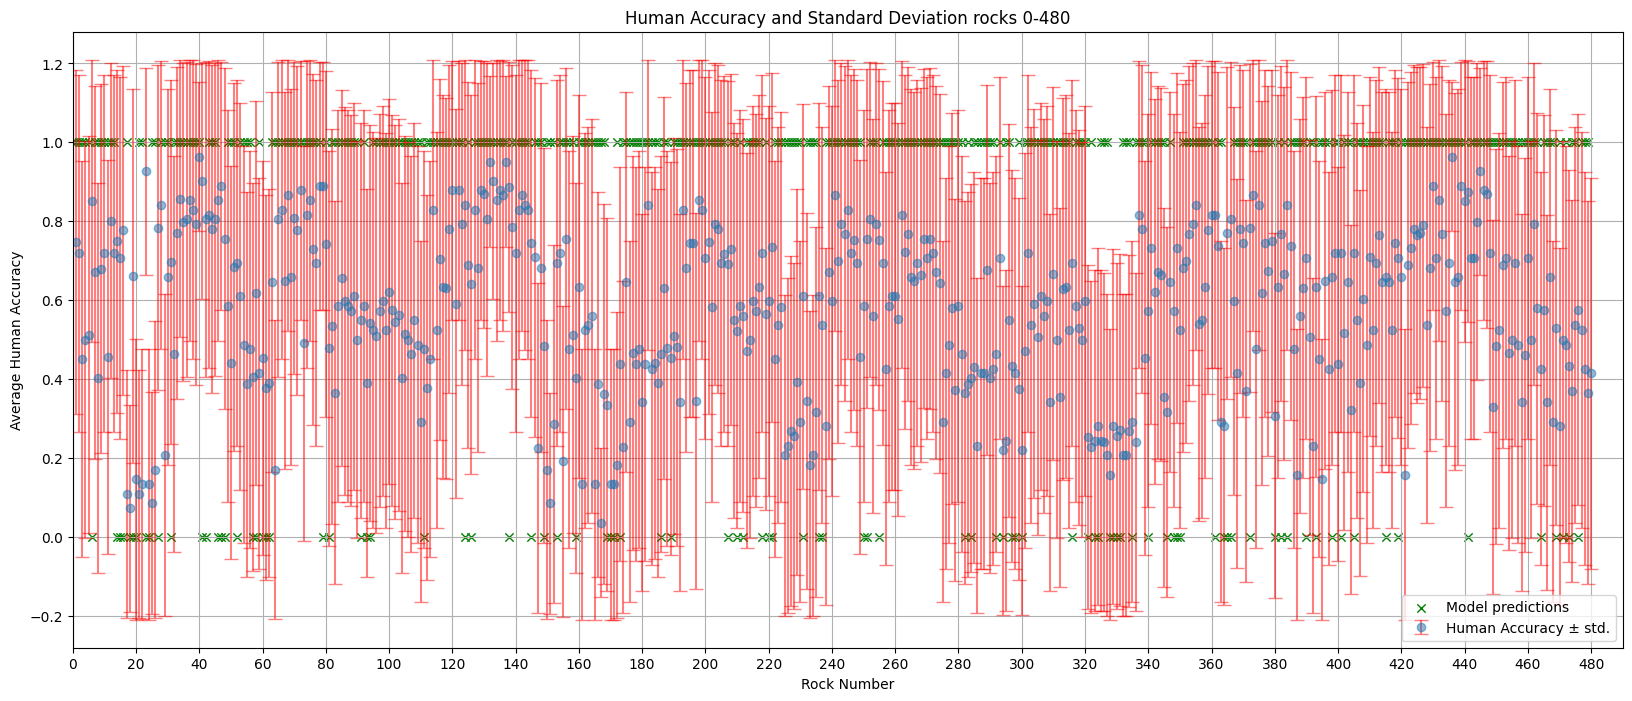

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))

#plot human accuracy and std
accuracy_stats = df.groupby('rocknumber')['cat_correct'].agg(['mean', 'std']).reset_index()
plt.errorbar(accuracy_stats['rocknumber'], accuracy_stats['mean'], yerr=accuracy_stats['std'], fmt='o', capsize=5, label='Human Accuracy ± std.', alpha=0.5, ecolor = 'r')

#get testing data for all rocks
testing_data = features_updated[features_updated['Token Number'].between(1,17)]
testing_data_final = testing_data.iloc[:, 1:]

#predict on rocks
predictions = best_rf.predict(testing_data_final)
actual_labels = full_data['rock category']

# Compare predictions to actual labels
correct_predictions = (predictions == actual_labels).astype(int)
predictions_df = pd.DataFrame({'rocknumber': np.arange(0, 480), 'correct_prediction': predictions})

#add model predictions
plt.scatter(predictions_df['rocknumber'], correct_predictions,  color = "green", marker='x', lw=1, label = "Model predictions")

plt.title('Human Accuracy and Standard Deviation rocks 0-480')
plt.xlabel('Rock Number')
plt.ylabel('Average Human Accuracy')

plt.xlim(0, 490)
plt.xticks(range(0, 490, 20))
plt.legend()
plt.grid(True)
plt.show()

Based on the plot of human accuracy and our model's accuracy, we can see that in some spots where the human accuracy was low (blue dots) our model seemed to make the same errors (green x's). If you look at rocks 320-340 you can see that our model was incorrect often where human accuracy is low and the same is also visible around rock 20. This shows that our model is making similar errors as a human but is overall more accurate. This is apparent at multiple points on the plot.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')